In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Dataset check

In [392]:
df_train = pd.read_csv('../kaggle/train.csv')
df_test = pd.read_csv('../kaggle/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [393]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [394]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1-1. Null data check

In [395]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


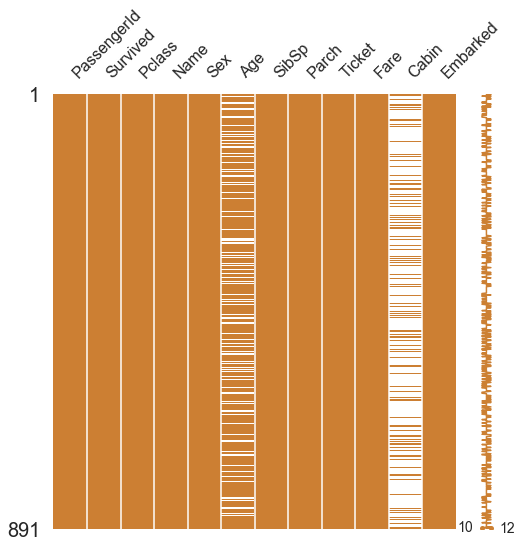

In [396]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

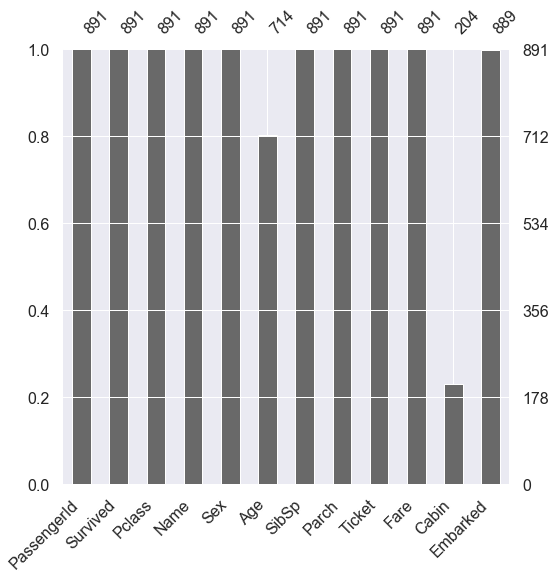

In [397]:
msno.bar(df_train.iloc[:, :], figsize=(8, 8))

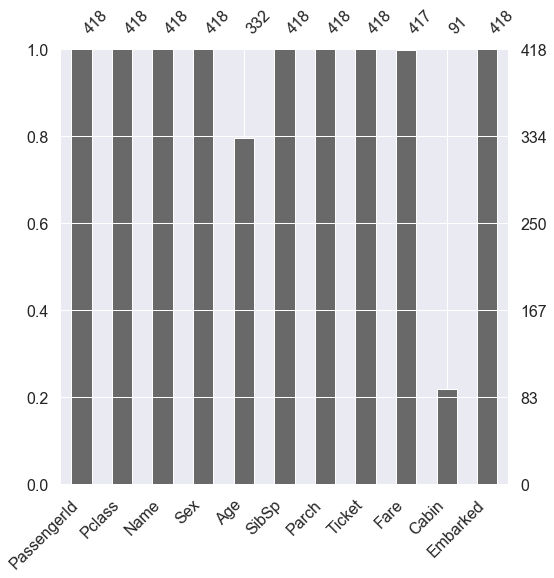

In [398]:
msno.bar(df_test, figsize=(8, 8))

### 1-2. Target label check

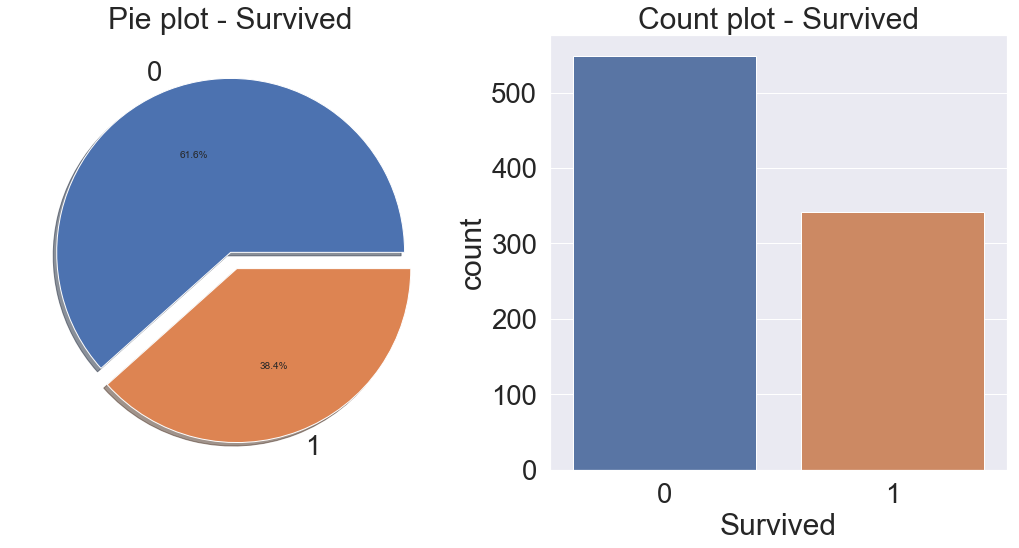

In [399]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2. EDA

### 2-1. Pclass

In [400]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
# 총 인원.

,Survived
Pclass,
1,216
2,184
3,491


In [401]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
# 생존 인원.

,Survived
Pclass,
1,136
2,87
3,119


In [402]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


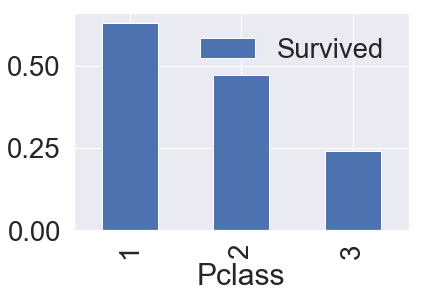

In [403]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

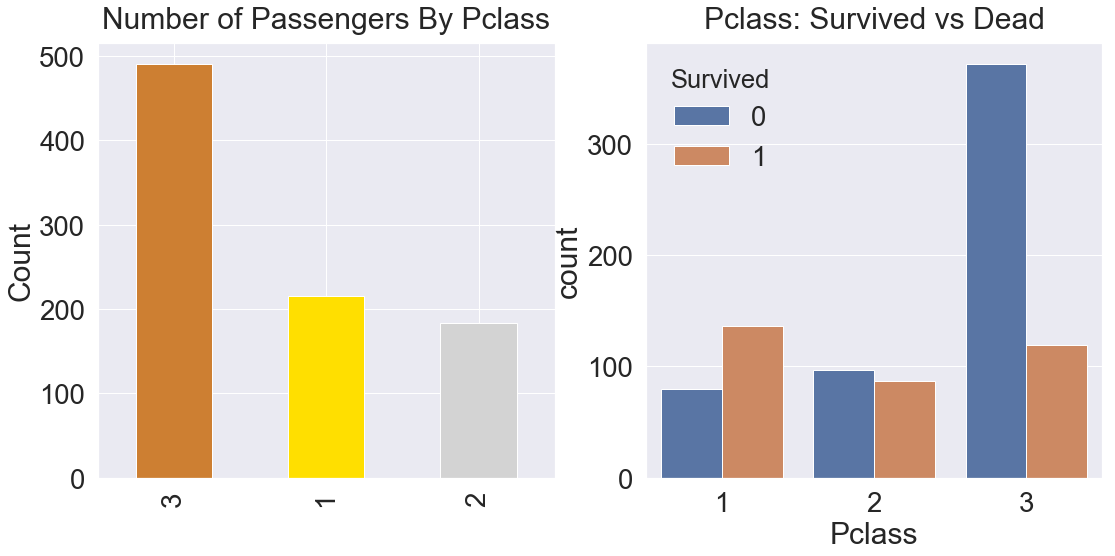

In [404]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

### 2-2. Sex

Text(0.5, 1.0, 'Sex: Survived vs Dead')

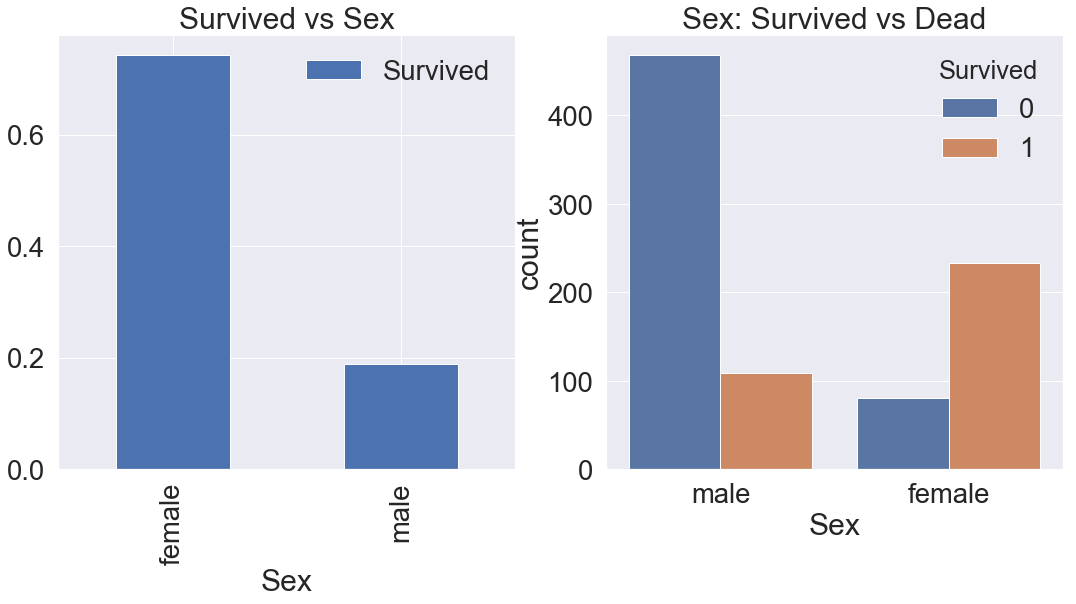

In [405]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

In [406]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [407]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2-3. Both Sex and Pclass

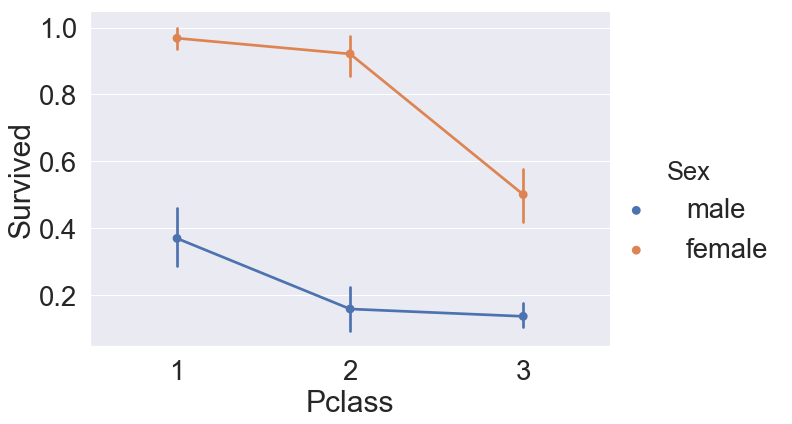

In [408]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

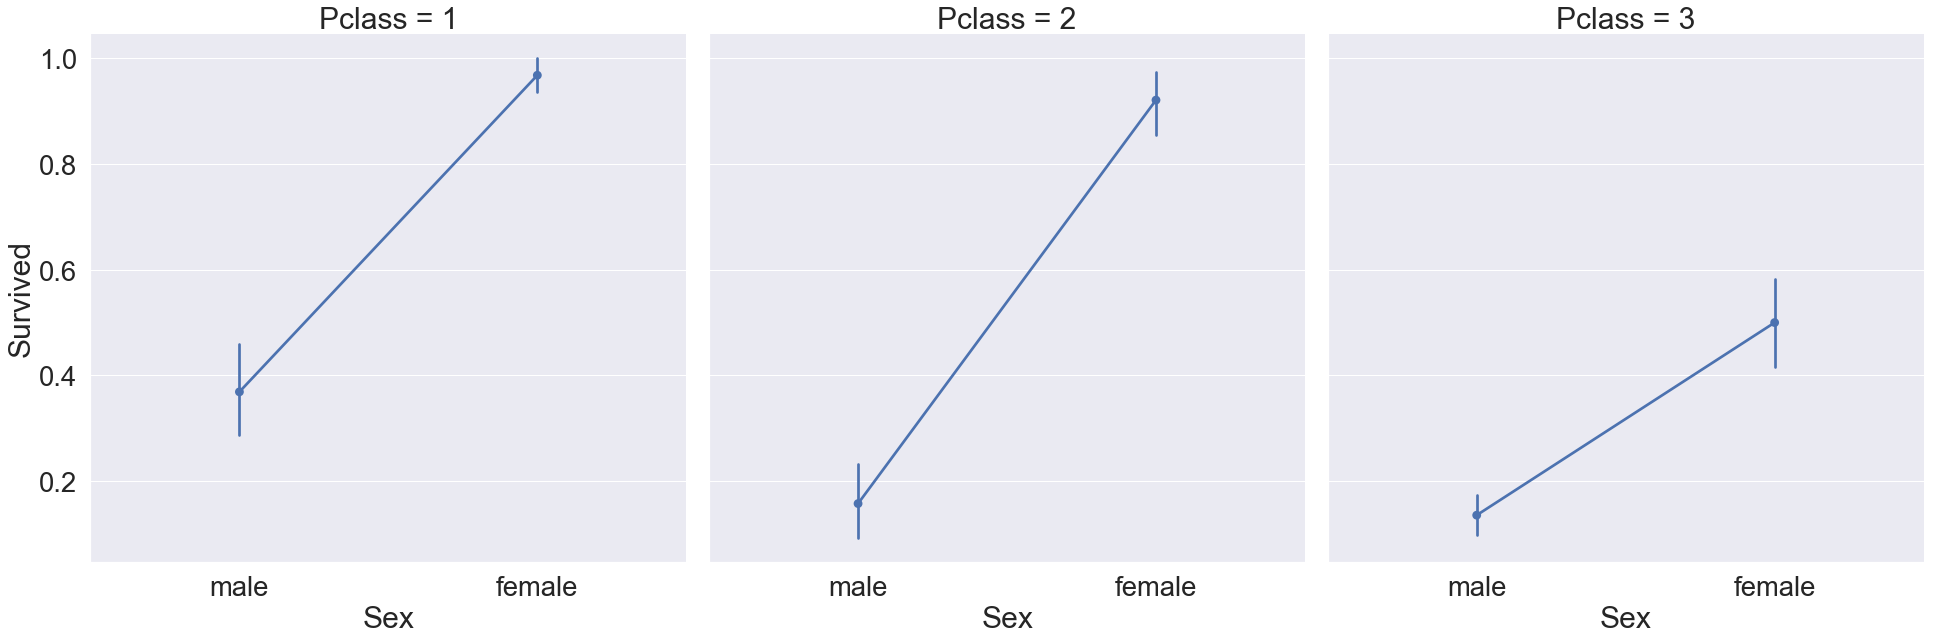

In [409]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

### 2-4. Age

In [410]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


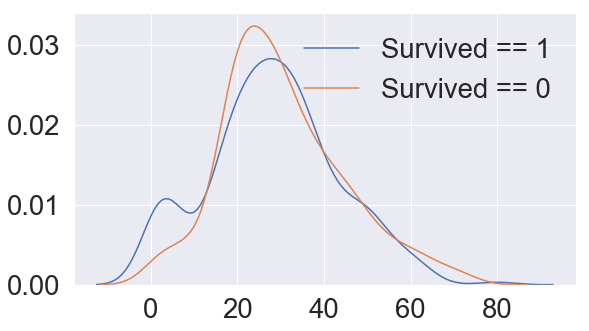

In [411]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

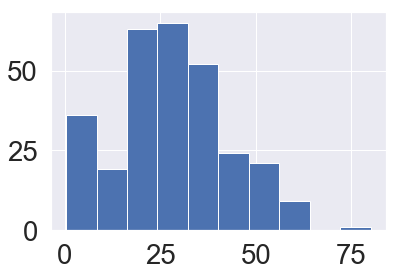

In [412]:
df_train[df_train['Survived'] == 1]['Age'].hist()

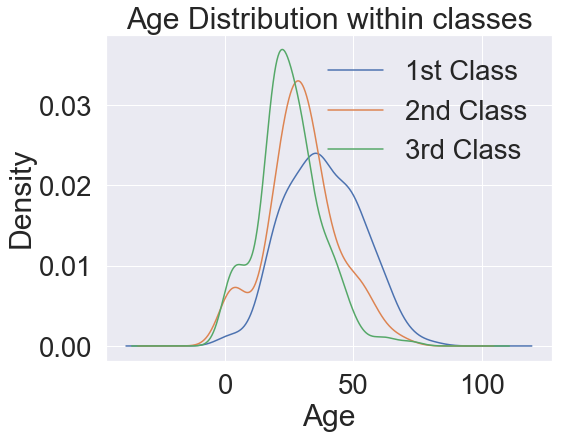

In [413]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

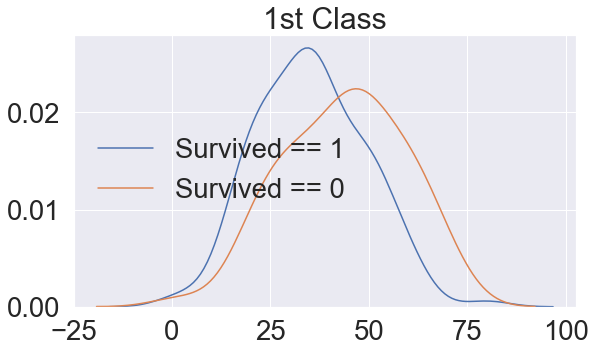

In [414]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st Class')
plt.show()

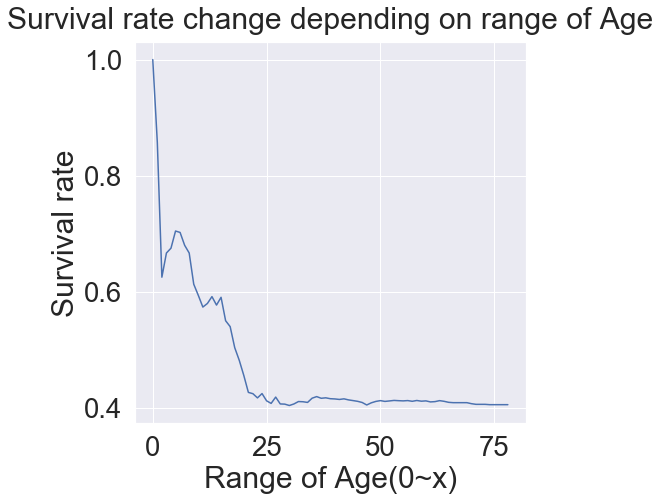

In [415]:
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [416]:
df_train[df_train['Age'] < i]['Survived']

0      0
1      1
2      1
3      1
4      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
18     0
20     0
21     1
22     1
23     1
24     0
25     1
27     0
30     0
33     0
34     0
35     0
37     0
38     0
      ..
856    1
857    1
858    1
860    0
861    0
862    1
864    0
865    1
866    1
867    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 713, dtype: int64

In [417]:
df_train[df_train['Age'] < i]['Survived'].shape

(713,)

### 2-5. Pclass, Sex, Age

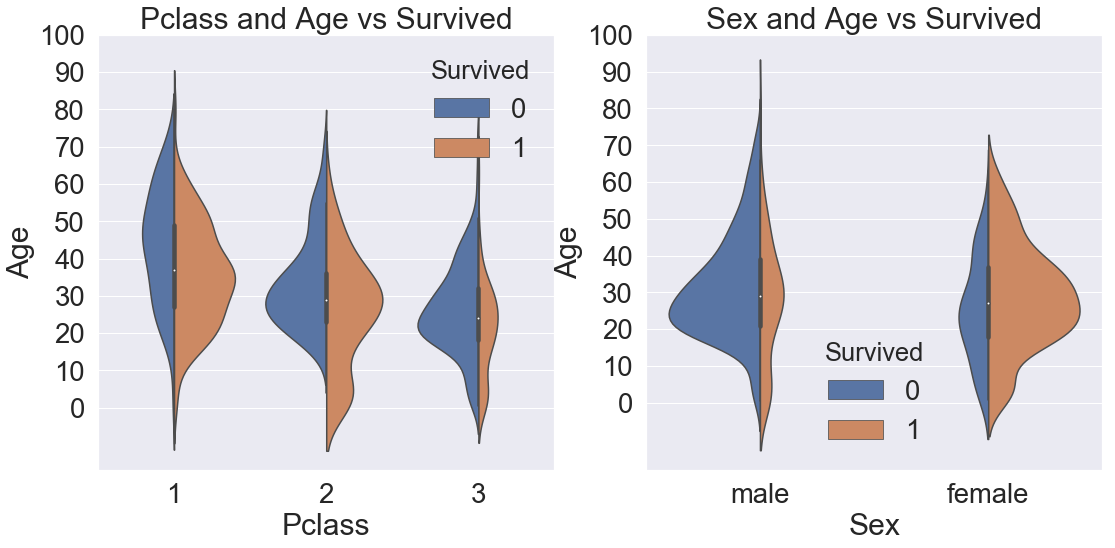

In [418]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 2-6. Embarked

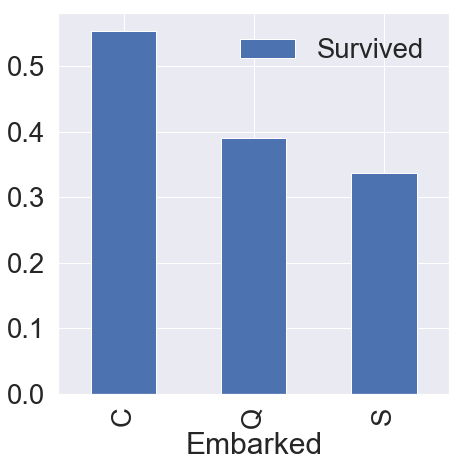

In [419]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

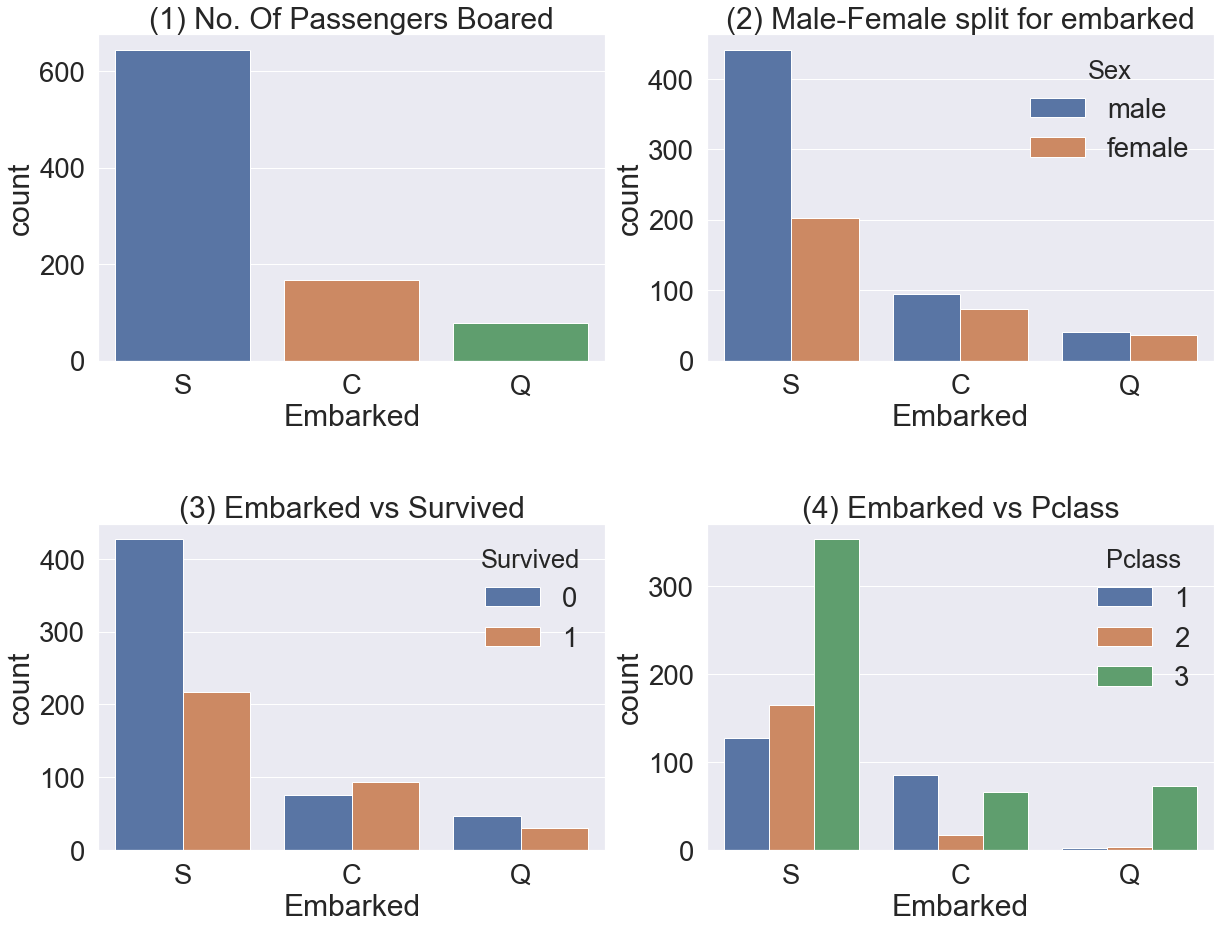

In [420]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0, 0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2-7. Family - SibSp + Parch

In [421]:
# Series끼리는 사칙연산이 가능!
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [422]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


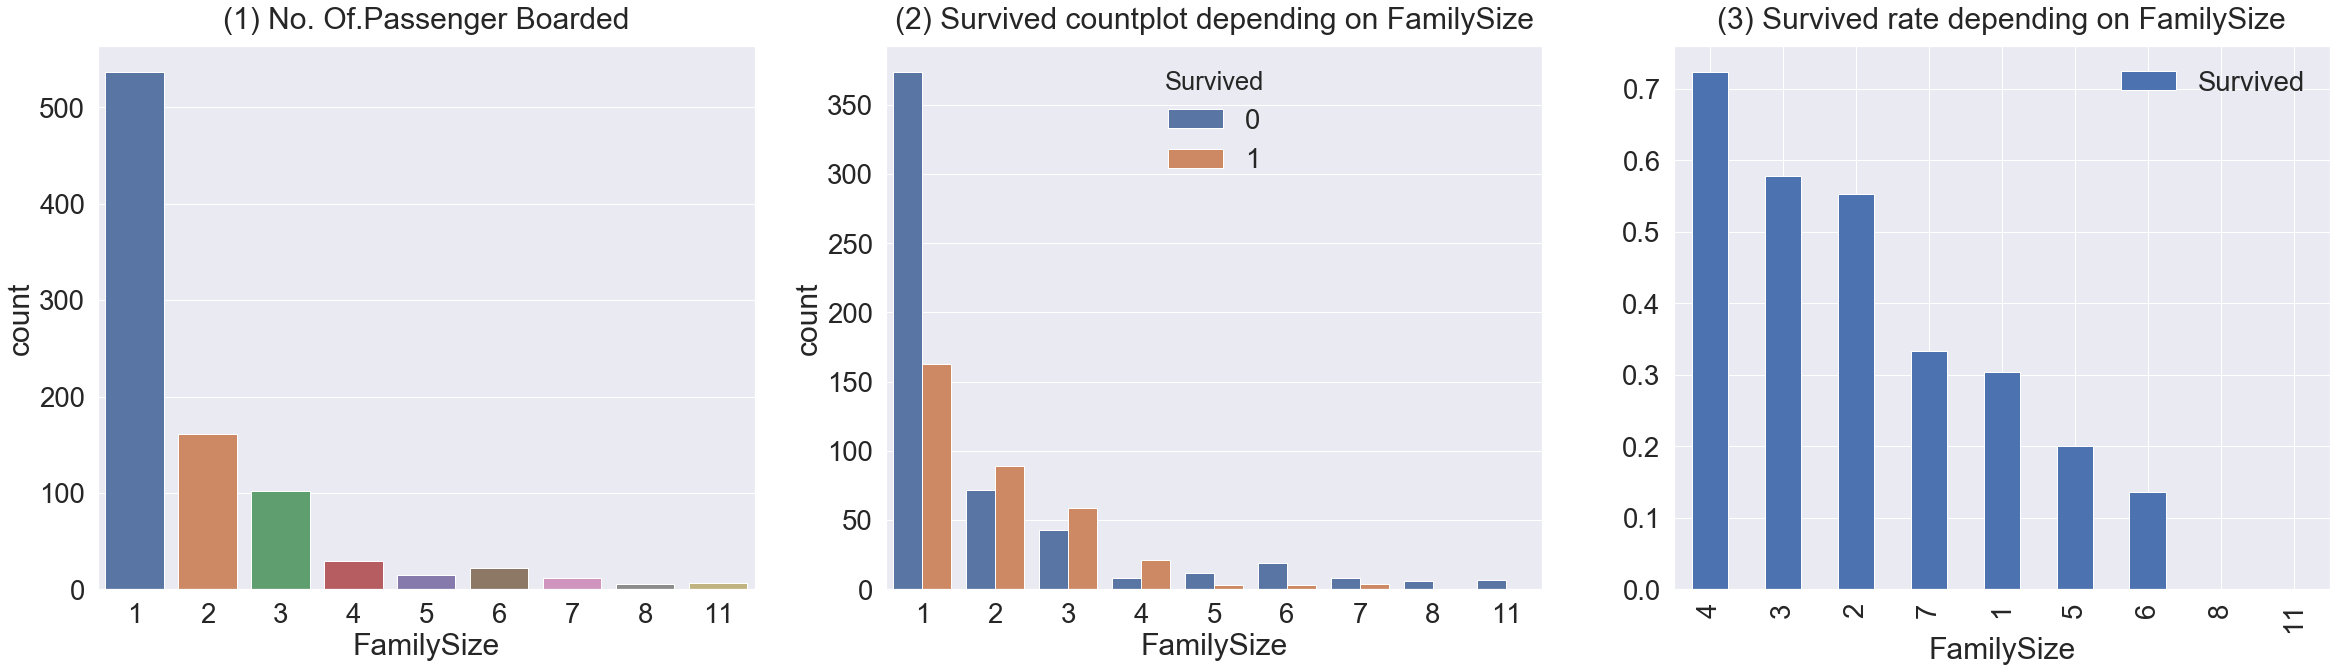

In [423]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of.Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2-8. Fare

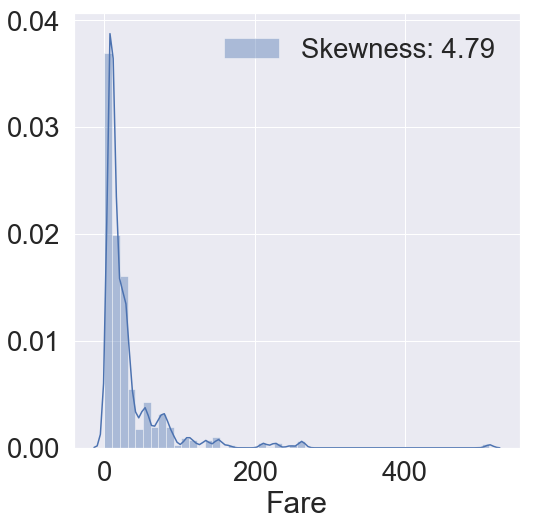

In [424]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [425]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [426]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

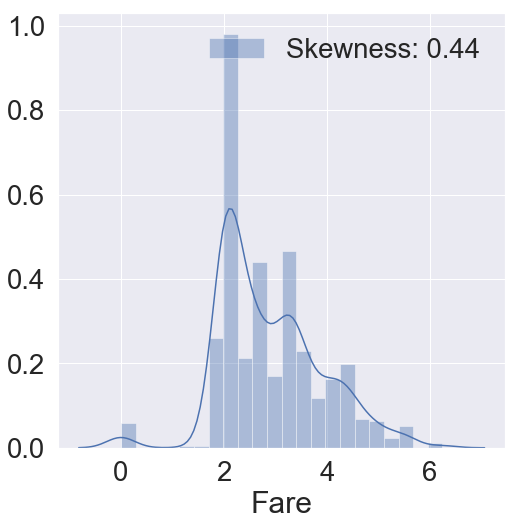

In [427]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [428]:
df_train['Ticket'].value_counts()

347082                7
1601                  7
CA. 2343              7
CA 2144               6
347088                6
3101295               6
382652                5
S.O.C. 14879          5
LINE                  4
17421                 4
19950                 4
PC 17757              4
4133                  4
113781                4
2666                  4
113760                4
W./C. 6608            4
347077                4
349909                4
110152                3
PC 17760              3
345773                3
13502                 3
C.A. 31921            3
PC 17572              3
371110                3
239853                3
PC 17755              3
363291                3
SC/Paris 2123         3
                     ..
PC 17610              1
350047                1
315097                1
113509                1
113055                1
19972                 1
349216                1
17466                 1
36967                 1
111428                1
7553            

## 3. Feature Engineering

### 3-1. Fill Null

#### 3-1-1. Fill Null in Age

In [429]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

In [430]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='cool')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [431]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [432]:
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [433]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


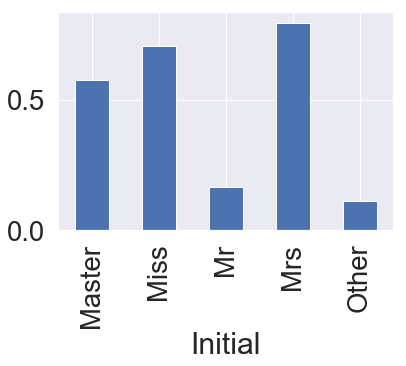

In [434]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [435]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 46

In [436]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 46

#### 3-1-2. Fill Null in Embarked

In [437]:
df_train['Embarked'].isnull().sum()

2

In [438]:
df_test['Embarked'].isnull().sum()

0

In [439]:
df_train.shape

(891, 14)

In [440]:
df_train['Embarked'].fillna('S', inplace=True)

In [441]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,3.154870,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,2.047693,NaN,Q,1,Mr


### 3-2. Change Age(continuous to categorical)

In [442]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [443]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [444]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [445]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [446]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [447]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [448]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3.0


### 3-3. Change Initial, Embarked and Sex

In [449]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [450]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [451]:
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [452]:
df_train.Embarked.unique()   # numpy의 array

array(['S', 'C', 'Q'], dtype=object)

In [453]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [454]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [455]:
df_train.Embarked.isnull().any()   # null값이 없다

False

In [456]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [457]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})

In [458]:
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [459]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

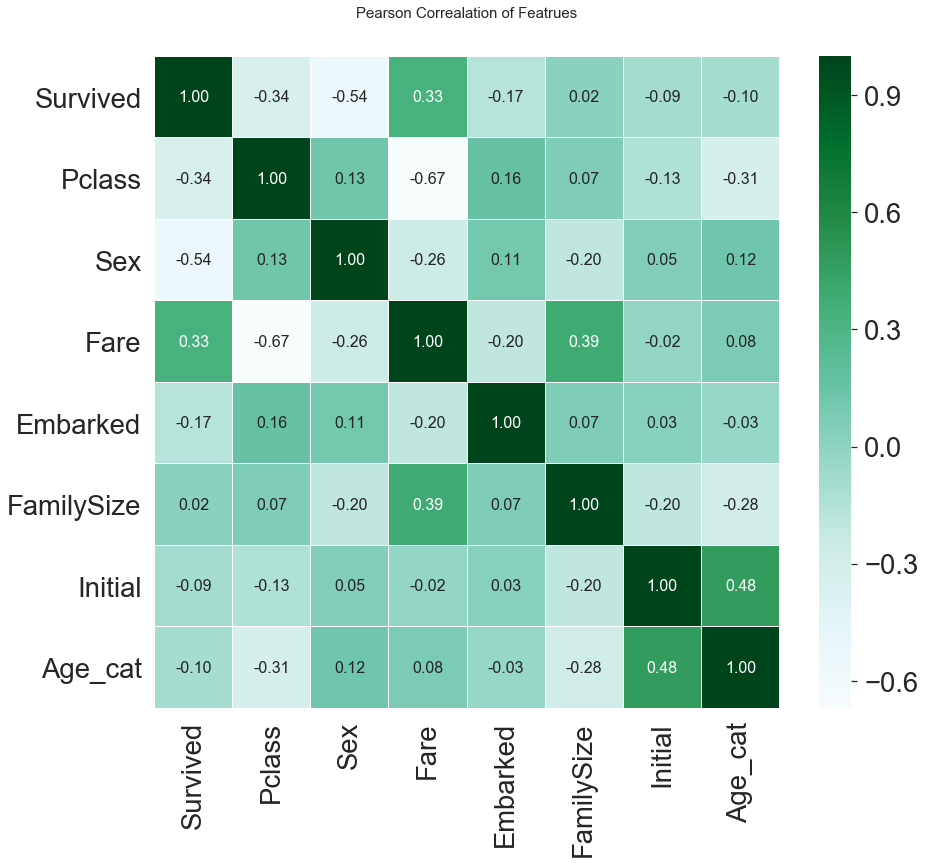

In [460]:
colormap = plt.cm.BuGn
plt.figure(figsize=(14, 12))
plt.title('Pearson Correalation of Featrues', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.1, vmax=1.0,
           square=False, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')

### 3-4. One-hot encoding on Initial and Embarked

In [461]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [462]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [463]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2.0,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3.0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2.0,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3.0,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3.0,0,0,1,0,0,0,0,1


### 3-5. Drop columns

In [464]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [465]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2.0,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3.0,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2.0,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3.0,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3.0,0,0,1,0,0,0,0,1


In [466]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3.0,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4.0,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6.0,0,1,0,0,0,0,1,0
3,3,1,8.6625,1,2.0,0,0,0,1,0,0,0,1
4,3,0,12.2875,3,2.0,0,0,1,0,0,0,0,1


## 4. Building machine learning model and prediction using the trained model

In [467]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 4-1. Preparation - Split dataset into train, valid, test set

In [468]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [469]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

### 4-2. Model generation and prediction

In [470]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [471]:
prediction = model.predict(X_vld)

In [472]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [473]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.58% 정확도로 생존 맞춤


In [474]:
(prediction == y_vld).sum() / prediction.shape[0]

0.835820895522388

### 4-3. Feature importance

In [475]:
model.feature_importances_

array([0.10941918, 0.12213816, 0.32053311, 0.09390991, 0.14439168,
       0.00733964, 0.00688044, 0.12488716, 0.0227568 , 0.00544198,
       0.01088415, 0.01559659, 0.01582119])

In [476]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2.0,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3.0,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2.0,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3.0,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3.0,0,0,1,0,0,0,0,1


In [477]:
df_test.columns

Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat', 'Initial_0',
       'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [478]:
from pandas import Series

In [479]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

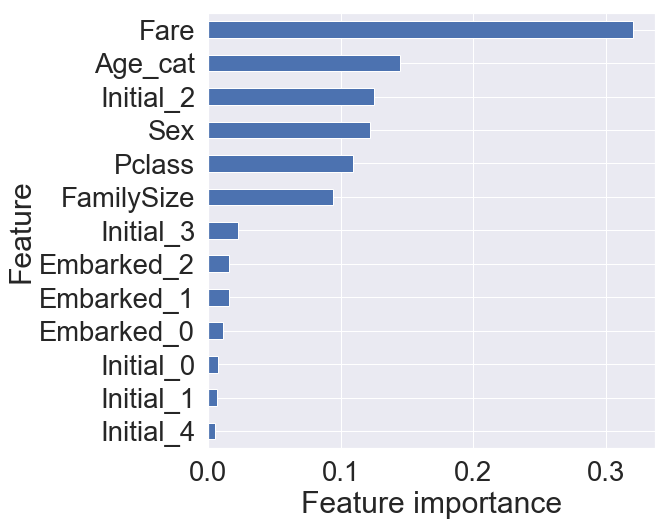

In [480]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh() # barh() : 90도 회전
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

### 4-4. Prediction on Test set

In [481]:
submission = pd.read_csv('../kaggle/sample_submission.csv')

In [482]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [483]:
X_test

array([[ 3.    ,  1.    ,  7.8292, ...,  0.    ,  1.    ,  0.    ],
       [ 3.    ,  0.    ,  7.    , ...,  0.    ,  0.    ,  1.    ],
       [ 2.    ,  1.    ,  9.6875, ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 3.    ,  1.    ,  7.25  , ...,  0.    ,  0.    ,  1.    ],
       [ 3.    ,  1.    ,  8.05  , ...,  0.    ,  0.    ,  1.    ],
       [ 3.    ,  1.    , 22.3583, ...,  1.    ,  0.    ,  0.    ]])

In [484]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [485]:
np.where(np.isnan(X_test))

(array([], dtype=int64), array([], dtype=int64))

In [487]:
submission.to_csv('./submission_1.csv', index=False)